In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import pmdarima as pm
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

Using TensorFlow backend.
/home/sumanta/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sumanta/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sumanta/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sumanta/.local/lib/python3.6/site-packages/tensorflow/py

In [ ]:
data=pd.read_csv('climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv', index_col=0, squeeze=True, usecols=['dt','AverageTemperature', 'City'])

In [ ]:
dataset=data[data['City']=='Barddhaman']
dataset.drop(['City'],axis=1, inplace=True)

/home/sumanta/.local/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data.columns

Index(['AverageTemperature', 'City'], dtype='object')

In [ ]:
dataset=dataset[204:]
dataset.fillna(0, inplace=True)

In [ ]:
dataset.columns

Index(['AverageTemperature'], dtype='object')

In [ ]:
dataset.to_csv('AverageTeperature.csv')

In [ ]:
c=0
for i in range(len(dataset)):
    if dataset.iloc[i]['AverageTemperature']==0.00:
        c+=1
        print(i)
print(c)   

16
233
239
591
592
593
594
595
596
597
598
599
2408
13


In [ ]:
dataset.head(20)

,AverageTemperature
dt,
1813-01-01,15.819
1813-02-01,20.780
1813-03-01,24.166
1813-04-01,30.141
1813-05-01,31.497
1813-06-01,29.333
1813-07-01,28.982
1813-08-01,28.105
1813-09-01,28.713


## If there is a NaN value, that will be replaced by Avg of all the old values of the same month

In [ ]:
avgTemp=[]
for i in range (len(dataset)):
#     j=0
    k=0
    if dataset.iloc[i,0]==0.00: 
        j=i%12
        while (j<i):
            k+=dataset.iloc[j,0] 
            j+=12
        avgTemp.append(k/(int(i/12)))
    else:
        avgTemp.append(dataset.iloc[i,0])

In [ ]:
len(avgTemp)

2409

In [ ]:
avgTemp500=avgTemp[:500]
avgTemp1000=avgTemp[:1000]

In [ ]:
trainPart=0.7

In [ ]:
# mean_absolute_percentage_error(test500, forecasts500)

### For 500 Samples

In [ ]:
train500, test500=avgTemp500[:int(len(avgTemp500)*trainPart)], avgTemp500[int(len(avgTemp500)*trainPart):]

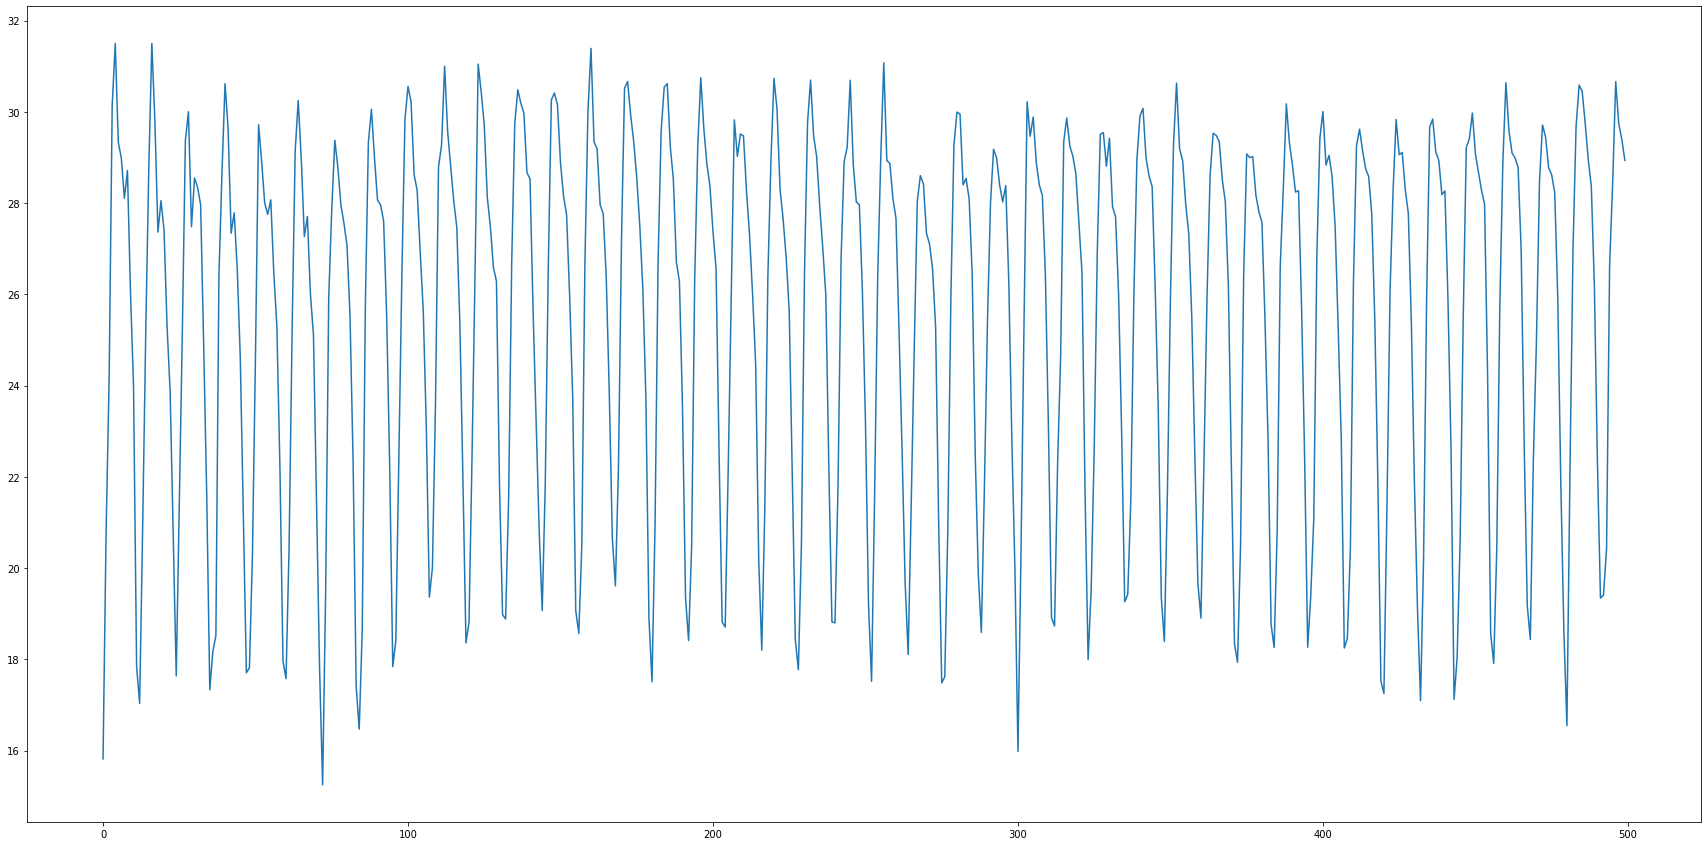

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(avgTemp500)
plt.show()

In [ ]:
model500 = pm.auto_arima(train500, seasonal=True, m=12)
forecasts500 = model500.predict(len(test500))

/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-statio

/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/sumanta/.local/lib/python3.6/site-pack

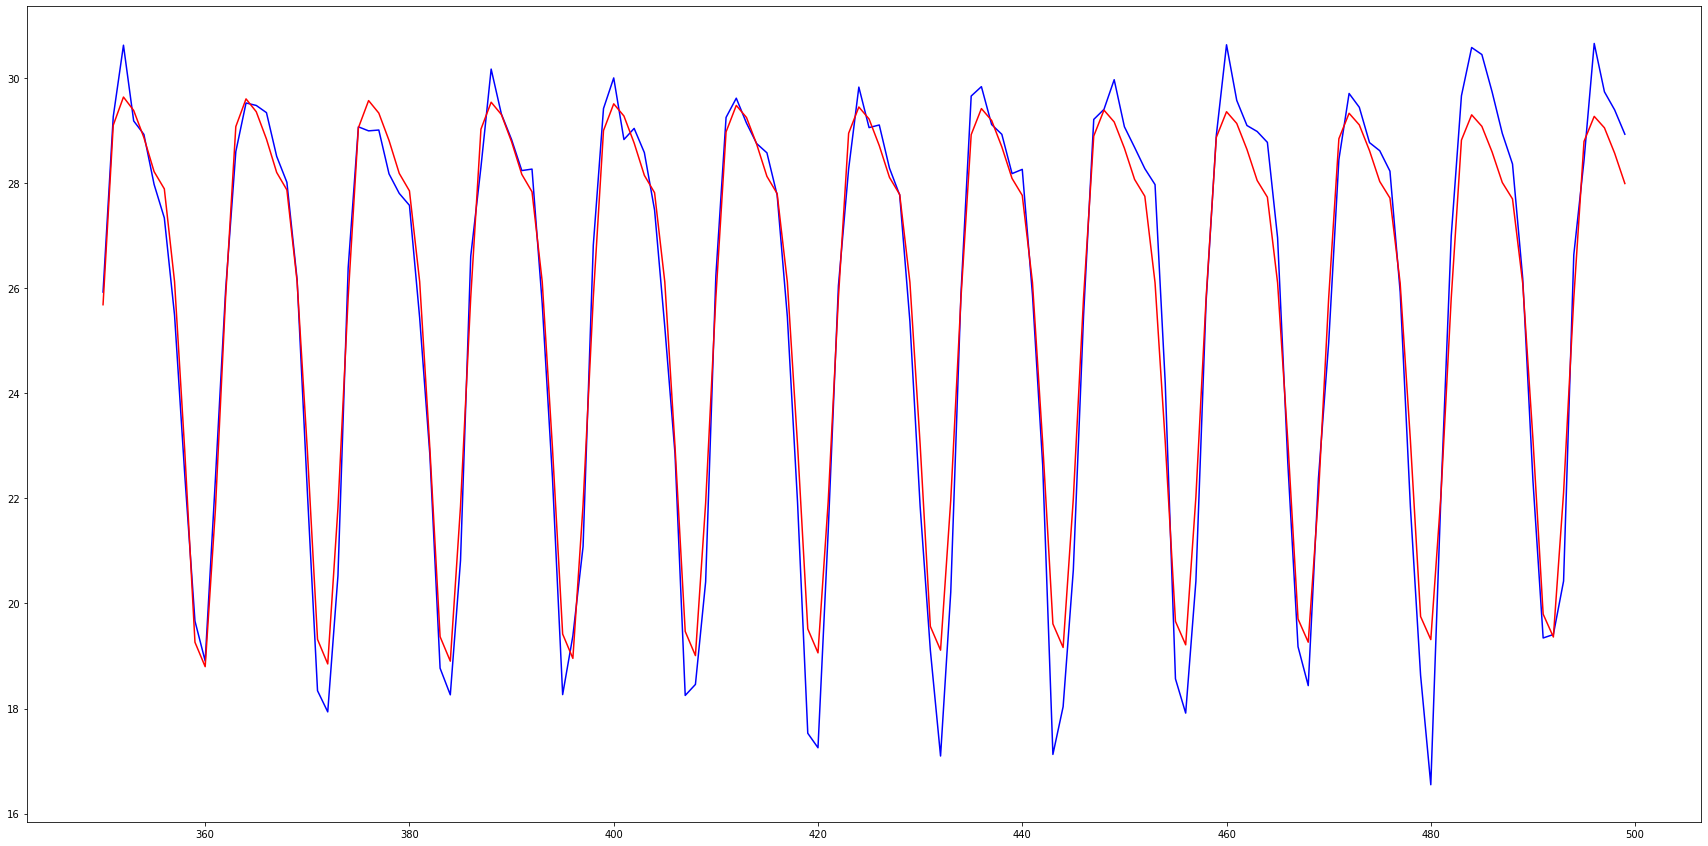

In [ ]:
plt.figure(figsize=(30,15))
x = np.arange(len(avgTemp500))
# plt.plot(x[:len(train500)],train500, color='blue')
plt.plot(x[len(train500):],test500, color='blue')
plt.plot(x[len(train500):],forecasts500, color='red')
plt.show()

In [ ]:
len(forecasts500)

150

In [ ]:
comparison_df = pd.DataFrame(test500, columns=['Actual'])#, axis = 1, sort = False)
comparison_df['Forecasts']=forecasts500
comparison_df
comparison_df.columns=['Y', 'Yhat']
comparison_df.corr(method='pearson', min_periods=1)

,Y,Yhat
Y,1.000000,0.987971
Yhat,0.987971,1.000000


In [ ]:
mserror = math.sqrt(mean_squared_error(test500, forecasts500))
maerror = mean_absolute_error(test500, forecasts500)
maperror= mean_absolute_percentage_error(test500, forecasts500)
print('ARIMA','mse =',mserror,'msa =',maerror, 'mape= ', maperror)

ARIMA mse = 0.8138407377943634 msa = 0.6315194731192009 mape=  2.737876999083184


In [ ]:
scaler=MinMaxScaler(feature_range=(0, 1))
avgTemp500_arr=np.array(avgTemp500)
avgTemp500_arr=avgTemp500_arr.reshape(avgTemp500_arr.shape[0],1)
avgTemp500_arr=scaler.fit_transform(avgTemp500_arr)

In [ ]:
len(avgTemp500)

500

In [ ]:
avgTemp500_df=pd.DataFrame(avgTemp500_arr)
avgTemp500_df.columns=['0']

df=avgTemp500_df['0'].shift(-1)
df1=avgTemp500_df['0'].shift(-2) 

df.fillna(value=0,inplace=True)
df1.fillna(value=0,inplace=True) 

avgTemp500_df['1']=df

In [ ]:
sample=avgTemp500_df.values
label=df1.values

In [ ]:
sample

array([[0.03484363, 0.34024871],
       [0.34024871, 0.5486949 ],
       [0.5486949 , 0.91652302],
       [0.91652302, 1.        ],
       [1.        , 0.86678158],
       [0.86678158, 0.8451736 ],
       [0.8451736 , 0.79118444],
       [0.79118444, 0.82861364],
       [0.82861364, 0.66406058],
       [0.66406058, 0.53705984],
       [0.53705984, 0.15962817],
       [0.15962817, 0.10970204],
       [0.10970204, 0.3500985 ],
       [0.3500985 , 0.60957892],
       [0.60957892, 0.83027579],
       [0.83027579, 1.        ],
       [1.        , 0.89553066],
       [0.89553066, 0.74556759],
       [0.74556759, 0.78792169],
       [0.78792169, 0.7480916 ],
       [0.7480916 , 0.61776656],
       [0.61776656, 0.53028811],
       [0.53028811, 0.34172618],
       [0.34172618, 0.14682344],
       [0.14682344, 0.38235656],
       [0.38235656, 0.60988673],
       [0.60988673, 0.86918247],
       [0.86918247, 0.90790446],
       [0.90790446, 0.75270869],
       [0.75270869, 0.81857917],
       [0.

In [ ]:
train_size=int(len(label)*0.70)

train_y500, test_y500=label[:train_size,], label[train_size:,]
train_x500, test_x500=sample[:train_size,:], sample[train_size:,:]

train_x500 = train_x500.reshape((train_x500.shape[0], 1, train_x500.shape[1]))
test_x500= test_x500.reshape((test_x500.shape[0], 1, test_x500.shape[1]))
print(train_x500.shape, train_y500.shape, test_x500.shape, test_y500.shape)

(350, 1, 2) (350,) (150, 1, 2) (150,)


In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint 

lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_x500.shape[1], train_x500.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01)
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
writer=lstm_model.fit(train_x500, train_y500, epochs=50, batch_size=20, validation_data=(test_x500, test_y500), verbose=2, shuffle=False, callbacks=[es, mc])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 350 samples, validate on 150 samples
Epoch 1/50
 - 1s - loss: 0.2980 - acc: 0.0029 - val_loss: 0.2284 - val_acc: 0.0133

Epoch 00001: val_loss improved from inf to 0.22840, saving model to best_model.h5
Epoch 2/50
 - 0s - loss: 0.1756 - acc: 0.0029 - val_loss: 0.1251 - val_acc: 0.0133

Epoch 00002: val_loss improved from 0.22840 to 0.12513, saving model to best_model.h5
Epoch 3/50
 - 0s - loss: 0.0909 - acc: 0.0029 - val_loss: 0.0647 - val_acc: 0.0067

Epoch 00003: val_loss improved from 0.12513 to 0.06473, saving model to best_model.h5
Epoch 4/50
 - 0s - loss: 0.0496 - acc: 0.0086 - val_loss: 0.0453 - val_acc: 0.0067

Epoch 00004: val_loss improved from 0.06473 to 0.04533, saving model to best_model.h5
Epoch 5/50
 - 0s - loss: 0.0399 - acc: 0.0086 - val_loss: 0.0438 - val_acc: 0.0067

Epoch 00005: val_loss improved from 0.04533 to 0.04381, saving model to best_model.h5
Epoch 6/50
 

In [ ]:
yhat500 = lstm_model.predict(test_x500)
yhata500=pd.DataFrame(yhat500)
testy500=pd.DataFrame(test_y500)
comparison_df500 = pd.DataFrame(test_y500)
comparison_df500['1']=yhat500

In [ ]:
comparison_df500.columns=['Y', 'Yhat']
comparison_df500.corr(method='pearson', min_periods=1)

,Y,Yhat
Y,1.000000,0.690411
Yhat,0.690411,1.000000


In [ ]:
mserror = math.sqrt(mean_squared_error(test_y500, yhat500))
maerror = mean_absolute_error(test_y500, yhat500)
maperror= mean_absolute_percentage_error(test_y500, yhat500)

print('LSTM','mse =', mserror,'msa =', maerror,'mape= ', maperror)

LSTM mse = 0.19388934552358714 msa = 0.1521561188915235 mape=  inf


/home/sumanta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
comparison_df

,Y,Yhat
0,25.929,24.876146
1,29.269,26.631362
2,30.629,27.435326
3,29.187,28.112812
4,28.931,28.855371
...,...,...
145,28.433,25.476226
146,30.662,25.476153
147,29.742,25.476115
148,29.397,25.476117


In [ ]:
len(train500)

350

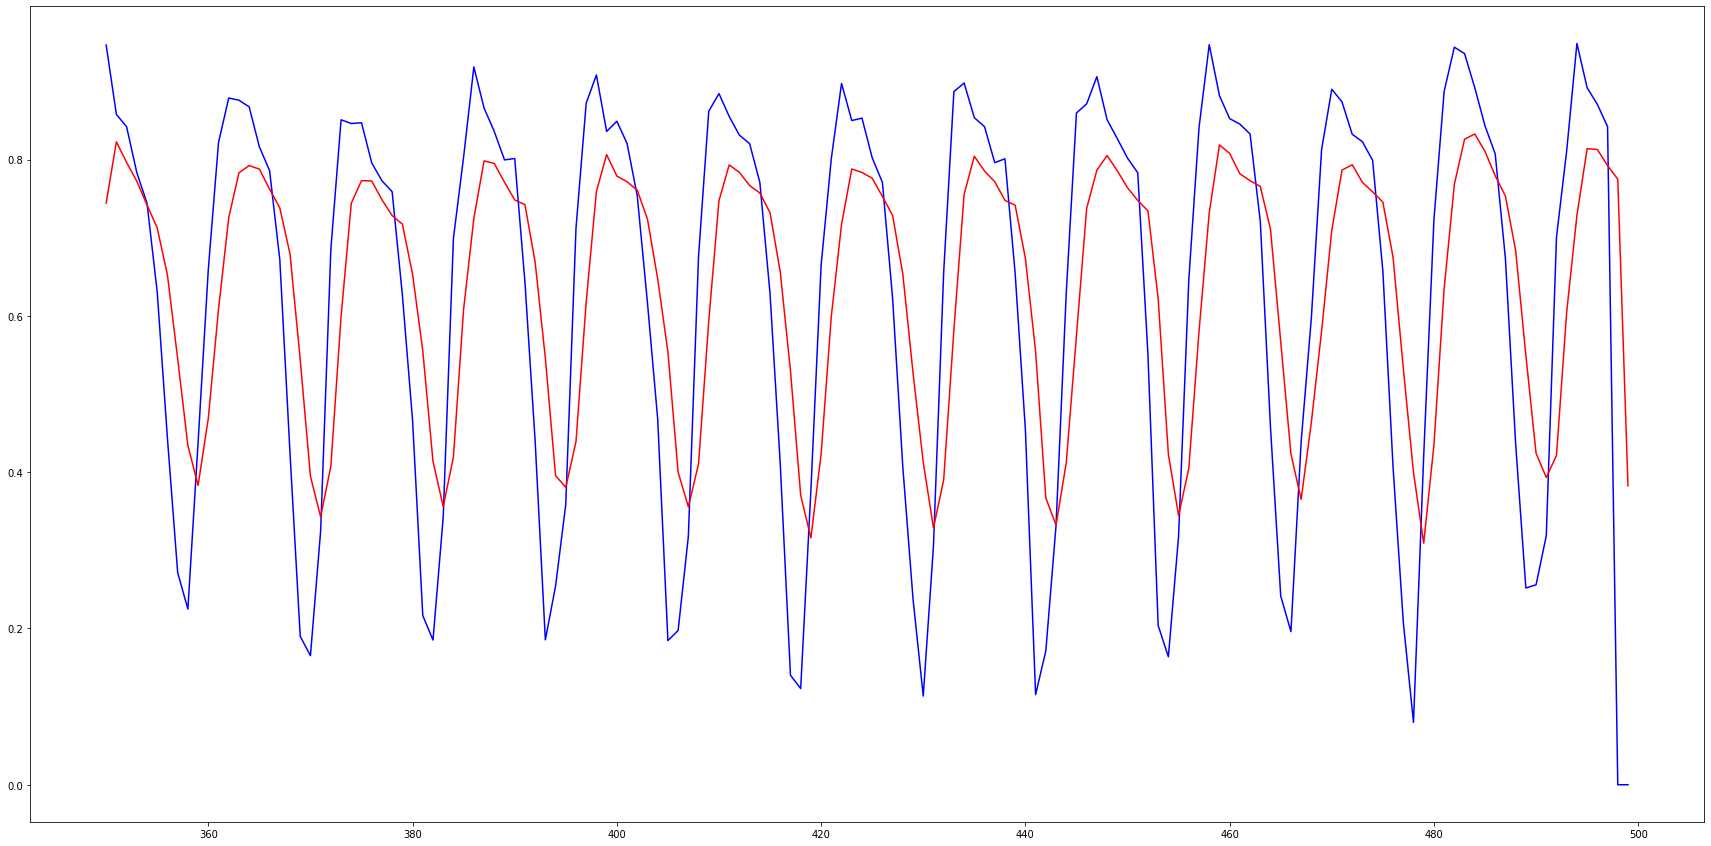

In [ ]:
plt.figure(figsize=(30,15))
x = np.arange(len(avgTemp500))
# plt.plot(x[:len(train_x500)],train500, color='blue')
plt.plot(x[len(train_x500):],test_y500, color='blue')
plt.plot(x[len(train_x500):],yhat500, color='red')
plt.show()

### For 1000 Samples

In [ ]:
train1000, test1000=avgTemp1000[:int(len(avgTemp1000)*trainPart)], avgTemp1000[int(len(avgTemp1000)*trainPart):]

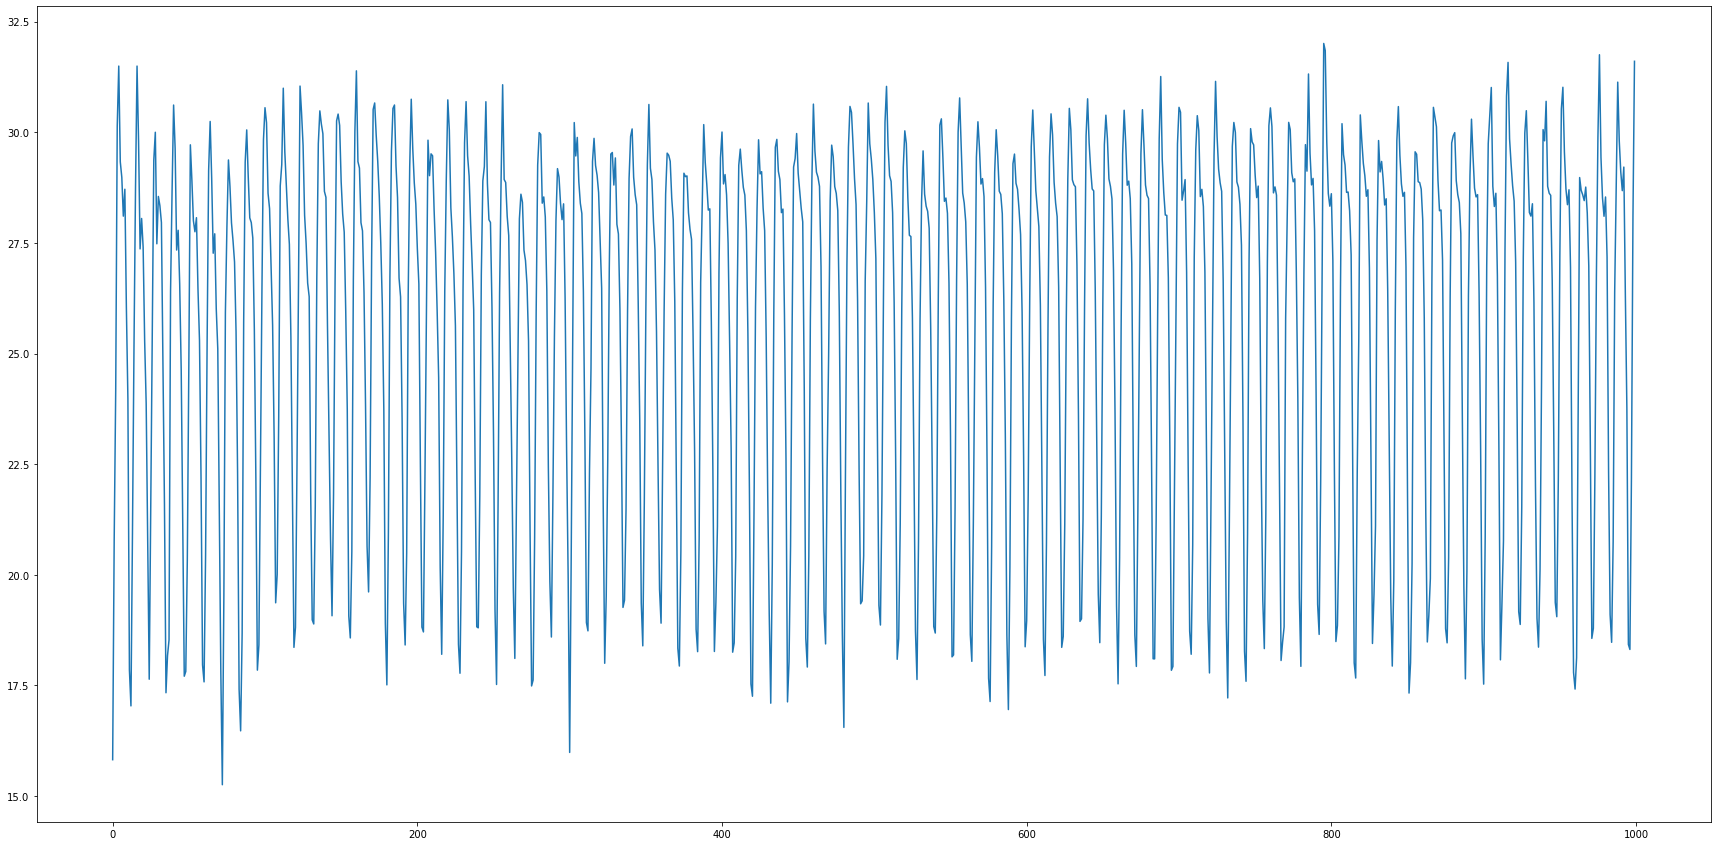

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(avgTemp1000)
plt.show()

In [ ]:
model1000 = pm.auto_arima(train1000, seasonal=True, m=12)


/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/pmdarima/arima/_auto_solvers.py:360: ModelFitWarning: Unable to fit ARIMA for order=(2, 0, 2) seasonal_order=(1, 0, 0, 12); data is likely non-stationary. (if you do not want to see these warnings, run with error_action="ignore")
  ModelFitWarning)
/home/sumanta/.local/lib/pytho

/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/sumanta/.local/lib/python3.6/site-pack

/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:9

/home/sumanta/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:933: FutureWarning: Passing attributes to check_is_fitted is deprecated and will be removed in 0.23. The attributes argument is ignored.
  "argument is ignored.", FutureWarning)


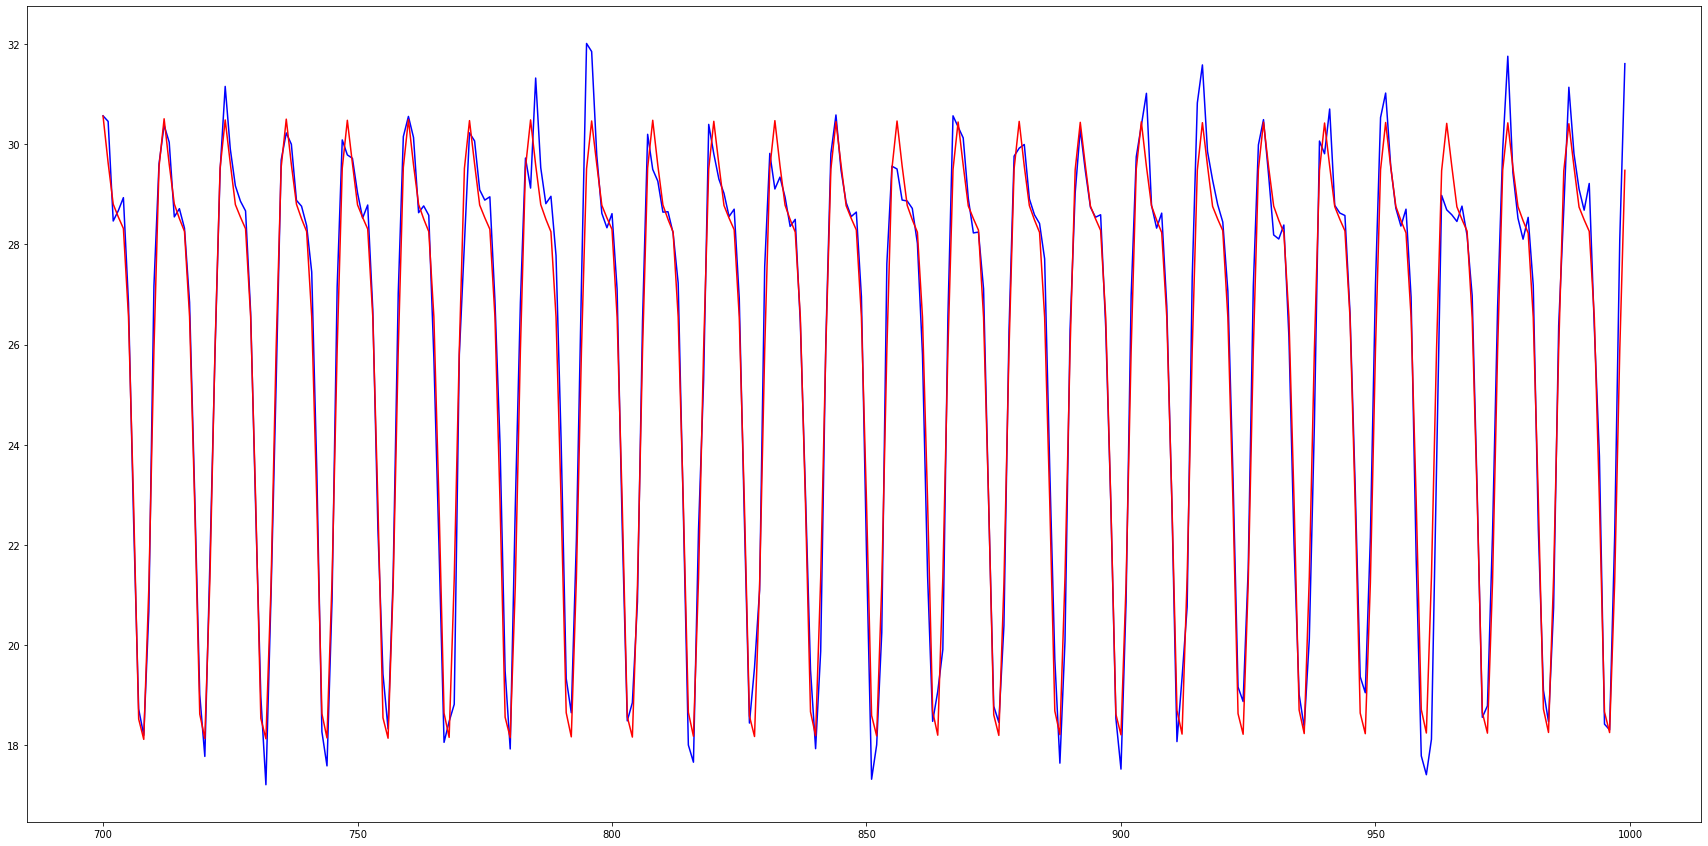

In [ ]:
forecasts1000 = model1000.predict(len(test1000))
plt.figure(figsize=(30,15))
x = np.arange(len(avgTemp1000))
# plt.plot(x[:len(train)],train, color='blue')
plt.plot(x[len(train1000):],test1000, color='blue')
plt.plot(x[len(train1000):],forecasts1000, color='red')
plt.show()

In [ ]:
comparison_df = pd.DataFrame(test1000, columns=['Actual'])#, axis = 1, sort = False)
comparison_df['Forecasts']=forecasts1000
comparison_df
comparison_df.columns=['Y', 'Yhat']
comparison_df.corr(method='pearson', min_periods=1)

,Y,Yhat
Y,1.000000,0.985954
Yhat,0.985954,1.000000


In [ ]:
mserror = math.sqrt(mean_squared_error(test1000, forecasts1000))
maerror = mean_absolute_error(test1000, forecasts1000)
maperror= mean_absolute_percentage_error(test1000, forecasts1000)
print('ARIMA','mse =',mserror,'msa =',maerror, 'mape= ', maperror)

ARIMA mse = 0.7372421716922133 msa = 0.5458608131399765 mape=  2.22436491146201


In [ ]:
avgTemp1000_arr=np.array(avgTemp1000)
avgTemp1000_arr=avgTemp1000_arr.reshape(avgTemp1000_arr.shape[0],1)
avgTemp1000_arr=scaler.fit_transform(avgTemp1000_arr)

In [ ]:
avgTemp1000_df=pd.DataFrame(avgTemp1000_arr)
avgTemp1000_df.columns=['0']

df=avgTemp1000_df['0'].shift(-1)
df1=avgTemp1000_df['0'].shift(-2) 

df.fillna(value=0,inplace=True)
df1.fillna(value=0,inplace=True) 

avgTemp1000_df['1']=df

In [ ]:
sample=avgTemp1000_df.values
label=df1.values

In [ ]:
train_size=int(len(label)*0.70)

train_y1000, test_y1000=label[:train_size,], label[train_size:,]
train_x1000, test_x1000=sample[:train_size,:], sample[train_size:,:]

train_x1000 = train_x1000.reshape((train_x1000.shape[0], 1, train_x1000.shape[1]))
test_x1000= test_x1000.reshape((test_x1000.shape[0], 1, test_x1000.shape[1]))
print(train_x1000.shape, train_y1000.shape, test_x1000.shape, test_y1000.shape)

(700, 1, 2) (700,) (300, 1, 2) (300,)


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_x1000.shape[1], train_x1000.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01)
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
writer=lstm_model.fit(train_x1000, train_y1000, epochs=50, batch_size=20, validation_data=(test_x1000, test_y1000), verbose=2, shuffle=False, callbacks=[es, mc])

Train on 700 samples, validate on 300 samples
Epoch 1/50
 - 1s - loss: 0.1998 - acc: 0.0014 - val_loss: 0.1098 - val_acc: 0.0067

Epoch 00001: val_loss improved from inf to 0.10982, saving model to best_model.h5
Epoch 2/50
 - 0s - loss: 0.0594 - acc: 0.0014 - val_loss: 0.0465 - val_acc: 0.0033

Epoch 00002: val_loss improved from 0.10982 to 0.04649, saving model to best_model.h5
Epoch 3/50
 - 0s - loss: 0.0384 - acc: 0.0014 - val_loss: 0.0450 - val_acc: 0.0033

Epoch 00003: val_loss improved from 0.04649 to 0.04499, saving model to best_model.h5
Epoch 4/50
 - 0s - loss: 0.0373 - acc: 0.0014 - val_loss: 0.0437 - val_acc: 0.0067

Epoch 00004: val_loss improved from 0.04499 to 0.04367, saving model to best_model.h5
Epoch 5/50
 - 0s - loss: 0.0362 - acc: 0.0014 - val_loss: 0.0423 - val_acc: 0.0067

Epoch 00005: val_loss improved from 0.04367 to 0.04233, saving model to best_model.h5
Epoch 6/50
 - 0s - loss: 0.0350 - acc: 0.0014 - val_loss: 0.0409 - val_acc: 0.0067

Epoch 00006: val_loss im

In [ ]:
yhat1000 = lstm_model.predict(test_x1000)
yhata=pd.DataFrame(yhat1000)
testy=pd.DataFrame(test_y1000)
comparison_df1000 = pd.concat([testy,yhata], axis = 1, sort = False)

In [ ]:
comparison_df1000.columns=['Y', 'Yhat']
comparison_df1000.corr(method='pearson', min_periods=1)

,Y,Yhat
Y,1.000000,0.893441
Yhat,0.893441,1.000000


In [ ]:
mserror = math.sqrt(mean_squared_error(test_y1000, yhat1000))
maerror = mean_absolute_error(test_y1000, yhat1000)
maperror= mean_absolute_percentage_error(yhat1000, test_y1000)

print('LSTM','mse =', mserror,'msa =', maerror,'mape= ', maperror)

LSTM mse = 0.11988832910212727 msa = 0.08846523669507625 mape=  70.02986585145575


In [ ]:
yhat1000 = lstm_model.predict(test_x1000)
test_x1000 = test_x1000.reshape((test_x1000.shape[0], test_x1000.shape[2]))
inv_yhat = np.concatenate((yhat1000, test_x1000[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

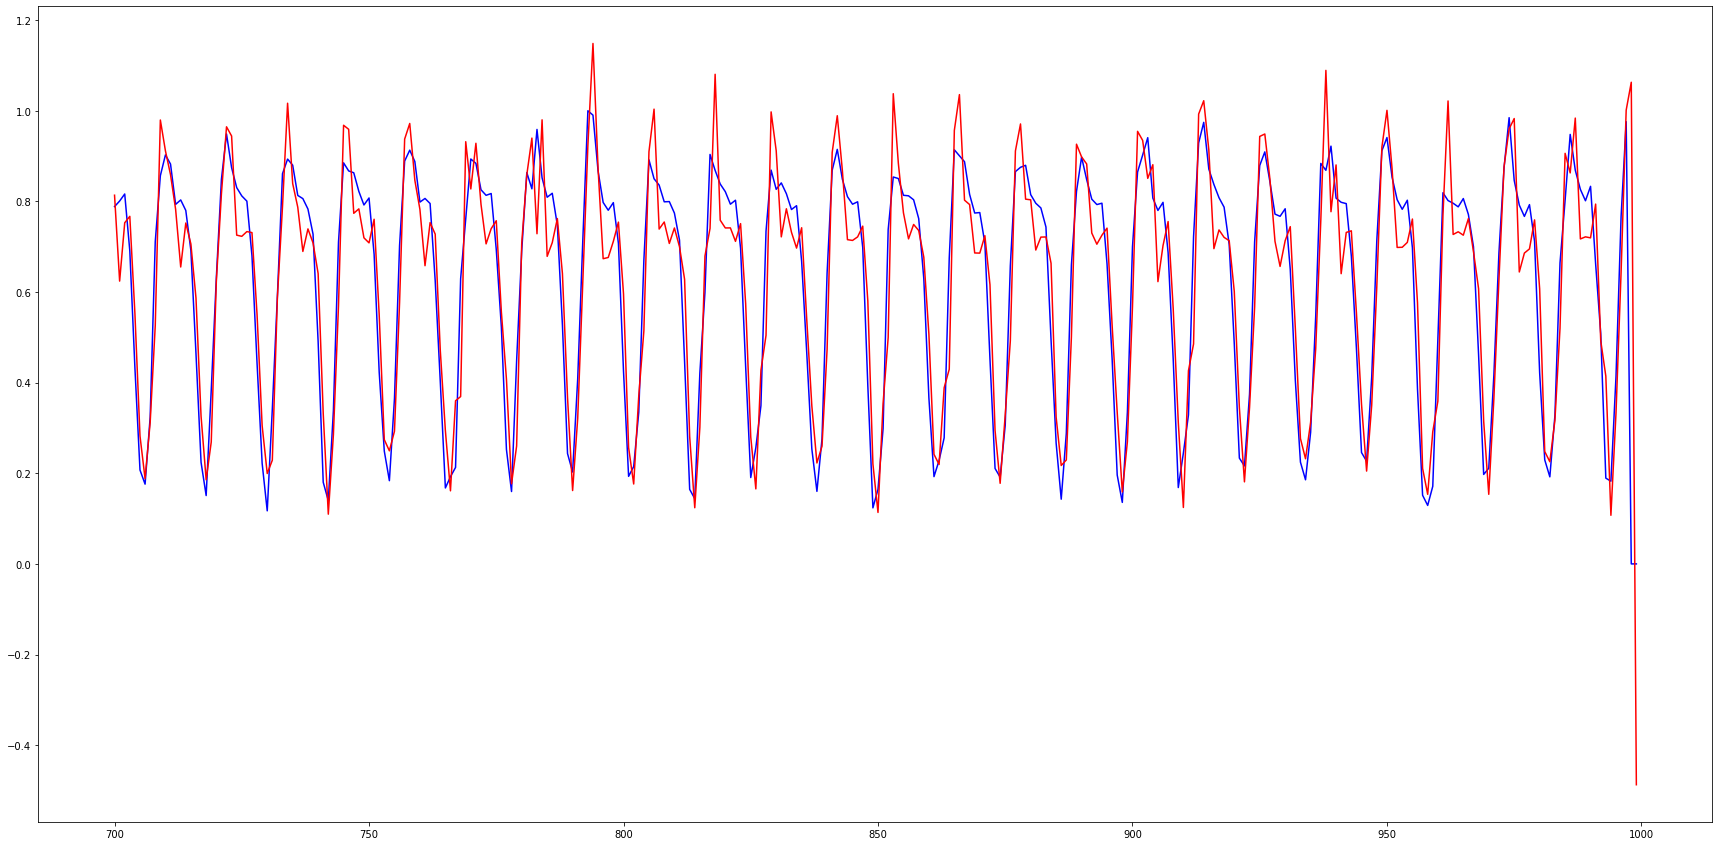

In [ ]:
plt.figure(figsize=(30,15))
x = np.arange(len(avgTemp1000))
# plt.plot(x[:len(train)],train, color='blue')
plt.plot(x[len(train_x1000):],test_y1000, color='blue')
plt.plot(x[len(train_x1000):],yhat1000, color='red')
plt.show()

### For All Samples

In [ ]:
train, test=avgTemp[:int(len(avgTemp)*trainPart)], avgTemp[int(len(avgTemp)*trainPart):]

In [ ]:
model = pm.auto_arima(train, seasonal=True, m=12)
forecasts = model.predict(len(test))

/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/sumanta/.local/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to conver

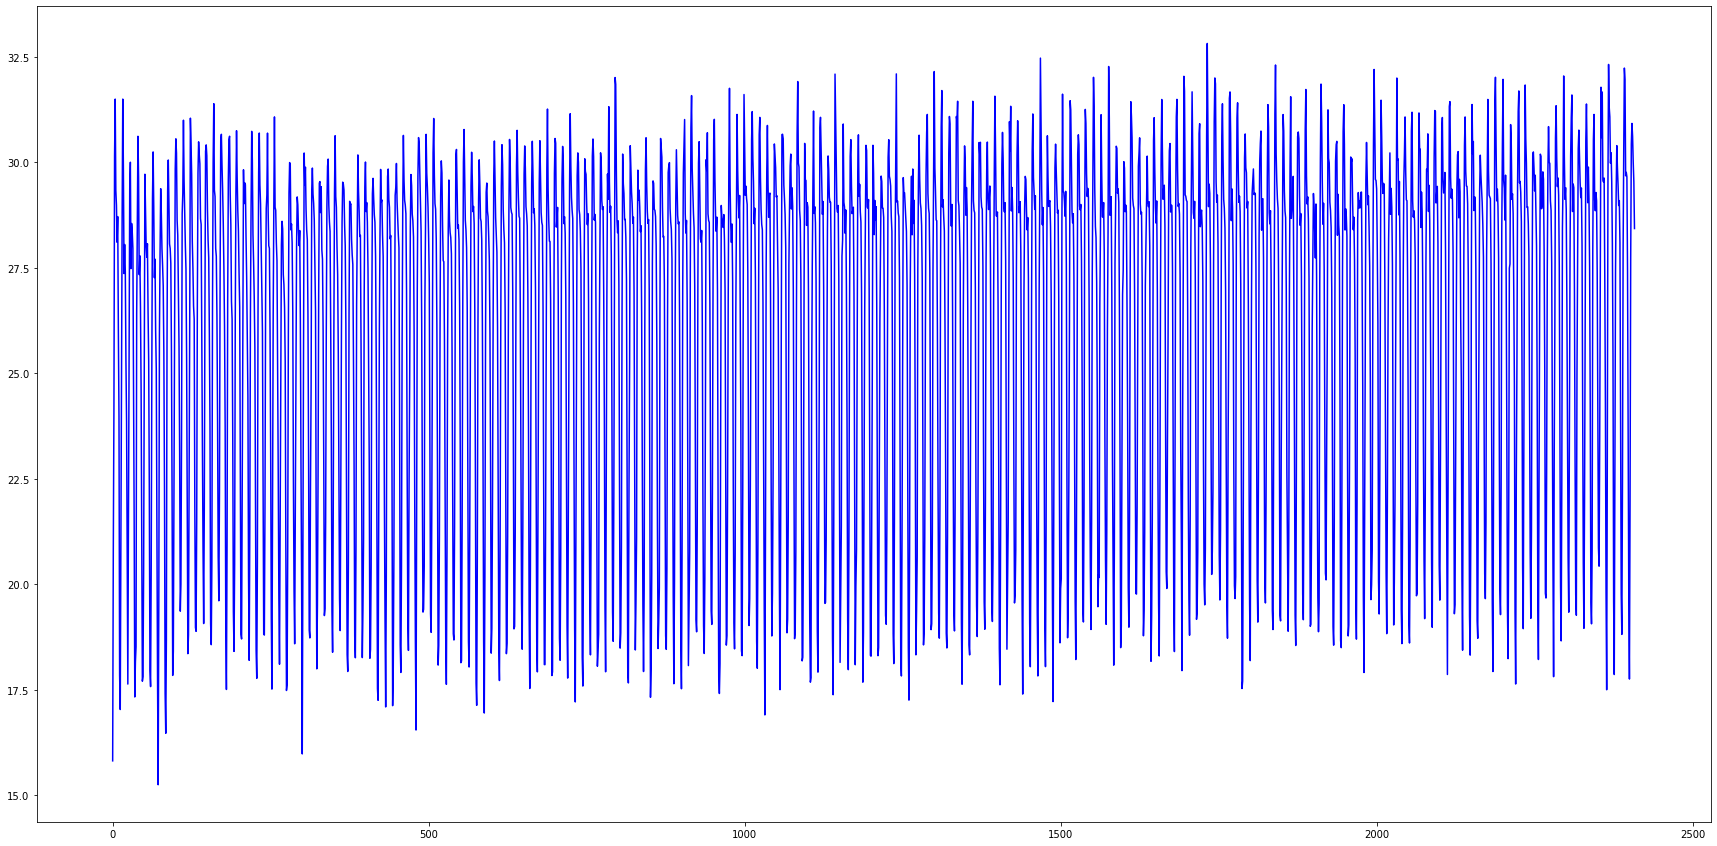

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(avgTemp, color='blue')
plt.show()

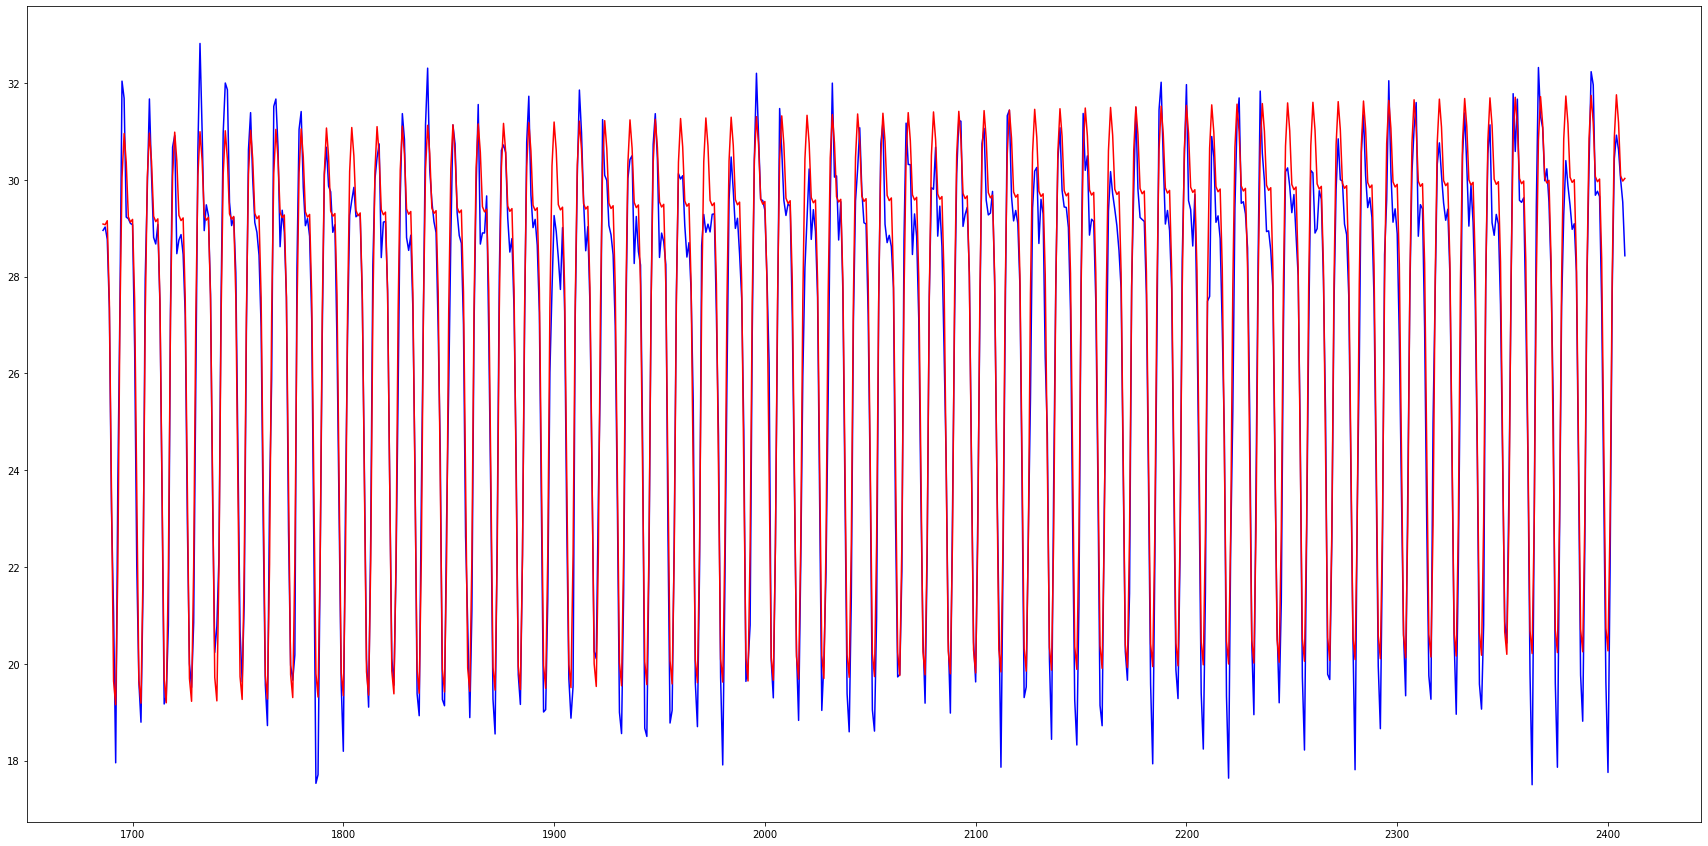

In [ ]:
plt.figure(figsize=(30,15))
x = np.arange(len(avgTemp))
# plt.plot(x[:len(train)],train, color='blue')
plt.plot(x[len(train):],test, color='blue')
plt.plot(x[len(train):],forecasts, color='red')
plt.show()

In [ ]:
comparison_df = pd.DataFrame(test, columns=['Actual'])#, axis = 1, sort = False)
comparison_df['Forecasts']=forecasts
comparison_df
comparison_df.columns=['Y', 'Yhat']
comparison_df.corr(method='pearson', min_periods=1)

,Y,Yhat
Y,1.000000,0.983445
Yhat,0.983445,1.000000


In [ ]:
mserror = math.sqrt(mean_squared_error(test, forecasts))
maerror = mean_absolute_error(test, forecasts)
maperror= mean_absolute_percentage_error(test, forecasts)
print('ARIMA','mse =',mserror,'msa =',maerror, 'mape= ', maperror)

ARIMA mse = 0.8593810499003552 msa = 0.6839645409959751 mape=  2.719916903484681


In [ ]:
avgTemp_arr=np.array(avgTemp)
avgTemp_arr=avgTemp_arr.reshape(avgTemp_arr.shape[0],1)
avgTemp_arr=scaler.fit_transform(avgTemp_arr)

In [ ]:
avgTemp_df=pd.DataFrame(avgTemp_arr)
avgTemp_df.columns=['0']

df=avgTemp_df['0'].shift(-1)
df1=avgTemp_df['0'].shift(-2) 

df.fillna(value=0,inplace=True)
df1.fillna(value=0,inplace=True) 

avgTemp_df['1']=df

In [ ]:
sample=avgTemp_df.values
label=df1.values

In [ ]:
train_size=int(len(label)*0.70)

train_y, test_y=label[:train_size,], label[train_size:,]
train_x, test_x=sample[:train_size,:], sample[train_size:,:]

train_x = train_x.reshape((train_x.shape[0], 1, train_x.shape[1]))
test_x= test_x.reshape((test_x.shape[0], 1, test_x.shape[1]))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1686, 1, 2) (1686,) (723, 1, 2) (723,)


In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mse', optimizer='adam',metrics=['accuracy'])

In [ ]:
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.01)
mc=ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
writer=lstm_model.fit(train_x, train_y, epochs=50, batch_size=20, validation_data=(test_x, test_y), verbose=2, shuffle=False, callbacks=[es, mc])

Train on 1686 samples, validate on 723 samples
Epoch 1/50
 - 1s - loss: 0.1513 - acc: 5.9312e-04 - val_loss: 0.0386 - val_acc: 0.0028

Epoch 00001: val_loss improved from inf to 0.03857, saving model to best_model.h5
Epoch 2/50
 - 0s - loss: 0.0368 - acc: 5.9312e-04 - val_loss: 0.0356 - val_acc: 0.0028

Epoch 00002: val_loss improved from 0.03857 to 0.03562, saving model to best_model.h5
Epoch 3/50
 - 0s - loss: 0.0341 - acc: 5.9312e-04 - val_loss: 0.0327 - val_acc: 0.0028

Epoch 00003: val_loss improved from 0.03562 to 0.03272, saving model to best_model.h5
Epoch 4/50
 - 0s - loss: 0.0310 - acc: 5.9312e-04 - val_loss: 0.0294 - val_acc: 0.0028

Epoch 00004: val_loss improved from 0.03272 to 0.02944, saving model to best_model.h5
Epoch 5/50
 - 0s - loss: 0.0275 - acc: 5.9312e-04 - val_loss: 0.0258 - val_acc: 0.0028

Epoch 00005: val_loss improved from 0.02944 to 0.02576, saving model to best_model.h5
Epoch 6/50
 - 0s - loss: 0.0236 - acc: 5.9312e-04 - val_loss: 0.0217 - val_acc: 0.0028


In [ ]:
yhat = lstm_model.predict(test_x)
yhata=pd.DataFrame(yhat)
testy=pd.DataFrame(test_y)
comparison_df = pd.concat([testy,yhata], axis = 1, sort = False)

In [ ]:
comparison_df.columns=['Y', 'Yhat']
comparison_df.corr(method='pearson', min_periods=1)

,Y,Yhat
Y,1.000000,0.911958
Yhat,0.911958,1.000000


In [ ]:
mserror = math.sqrt(mean_squared_error(test_y, yhat))
maerror = mean_absolute_error(test_y, yhat)
maperror= mean_absolute_percentage_error(yhat, test_y)

print('LSTM','mse =', mserror,'msa =', maerror,'mape= ', maperror)

LSTM mse = 0.09794286578482343 msa = 0.07720965100698265 mape=  57.5313735014992


In [ ]:
test_x = test_x.reshape((test_x.shape[0], test_x.shape[2]))
inv_yhat = np.concatenate((yhat, test_x[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

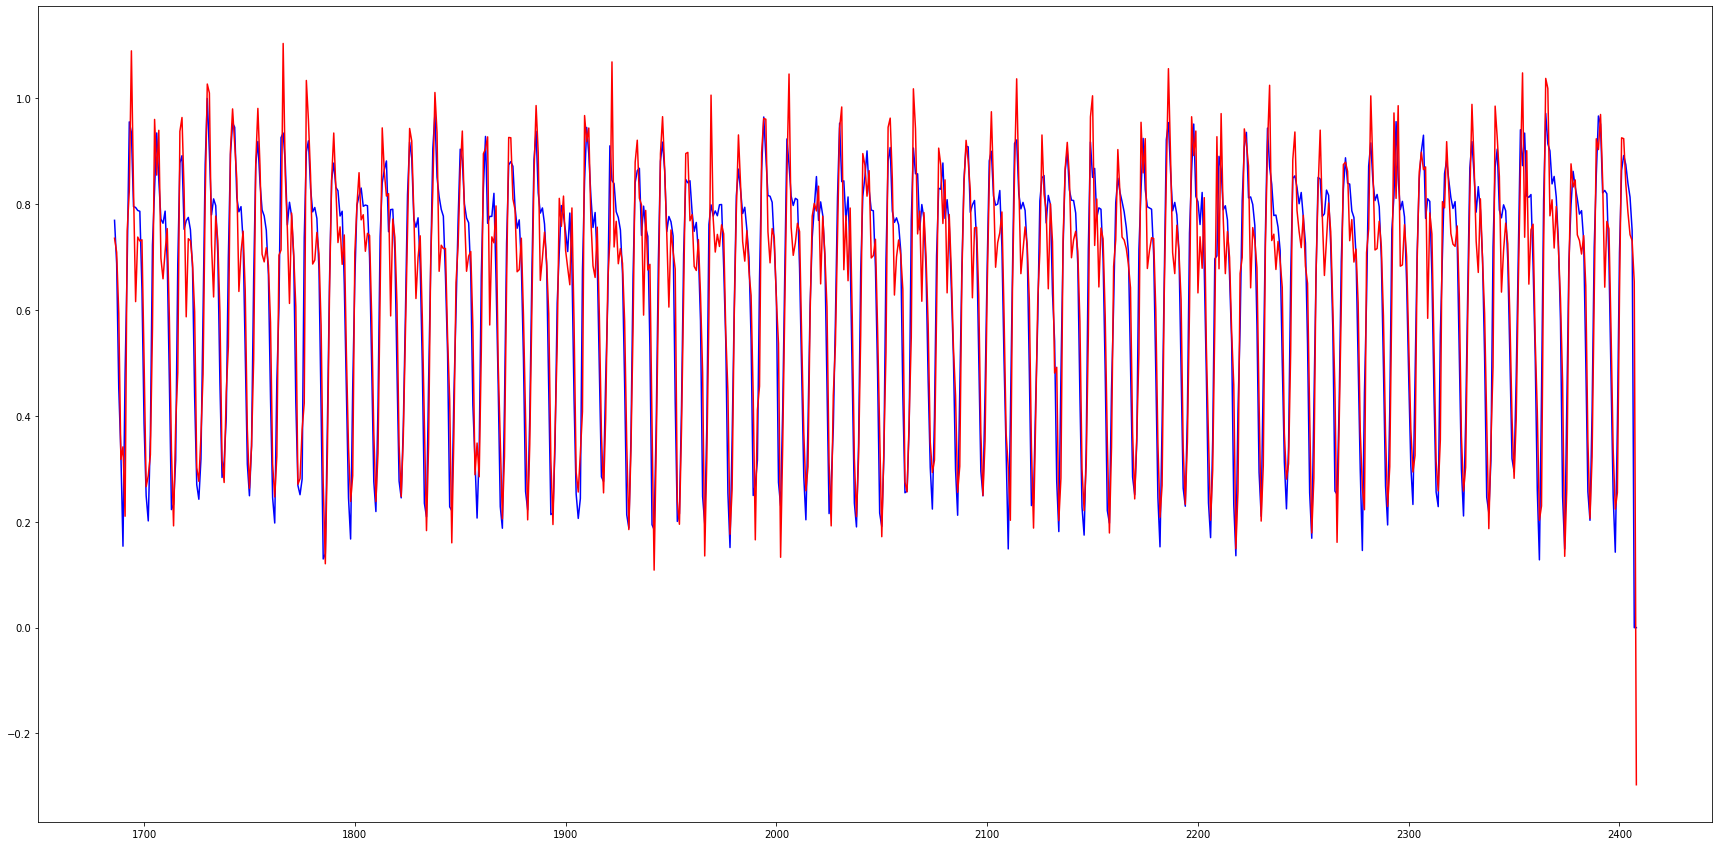

In [ ]:
plt.figure(figsize=(30,15))
x = np.arange(len(avgTemp))
# plt.plot(x[:len(train)],train, color='blue')
plt.plot(x[len(train_x):],test_y, color='blue')
plt.plot(x[len(train_x):], yhat, color='red')
plt.show()

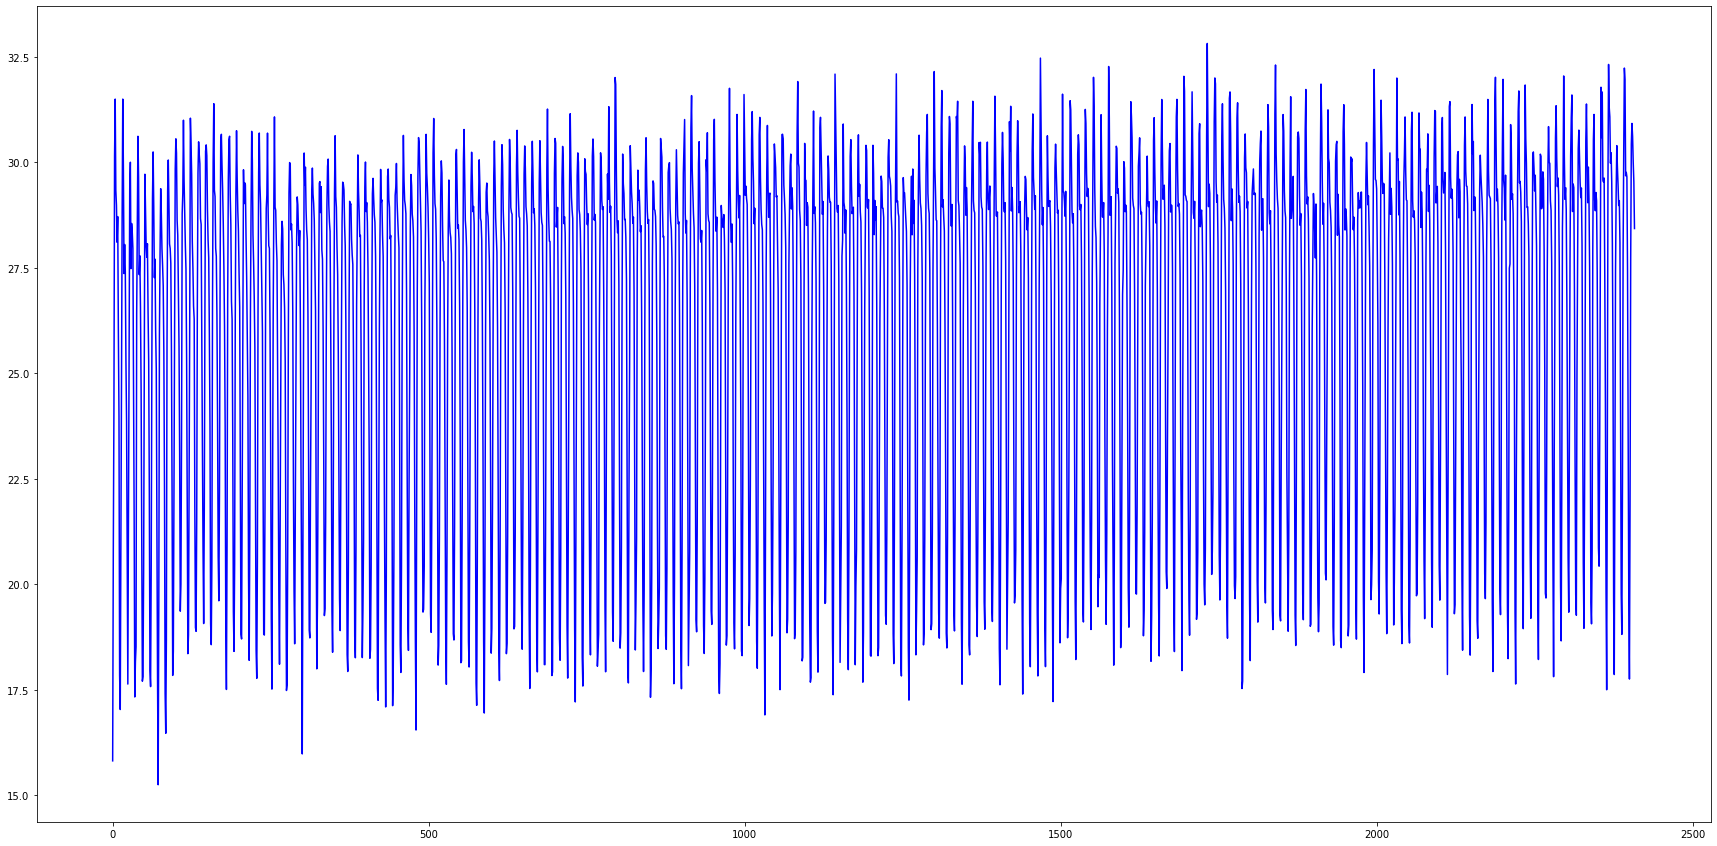

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(avgTemp, color='blue')
plt.show()